In [1]:
from pymatgen.io.espresso.PWscf import PWxml, PWin
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
import xml.etree.ElementTree as ET
from monty.io import zopen
import xmltodict
import numpy as np

# Sr3PbO 
noncolinear+SOC band structure

50.0 96 1


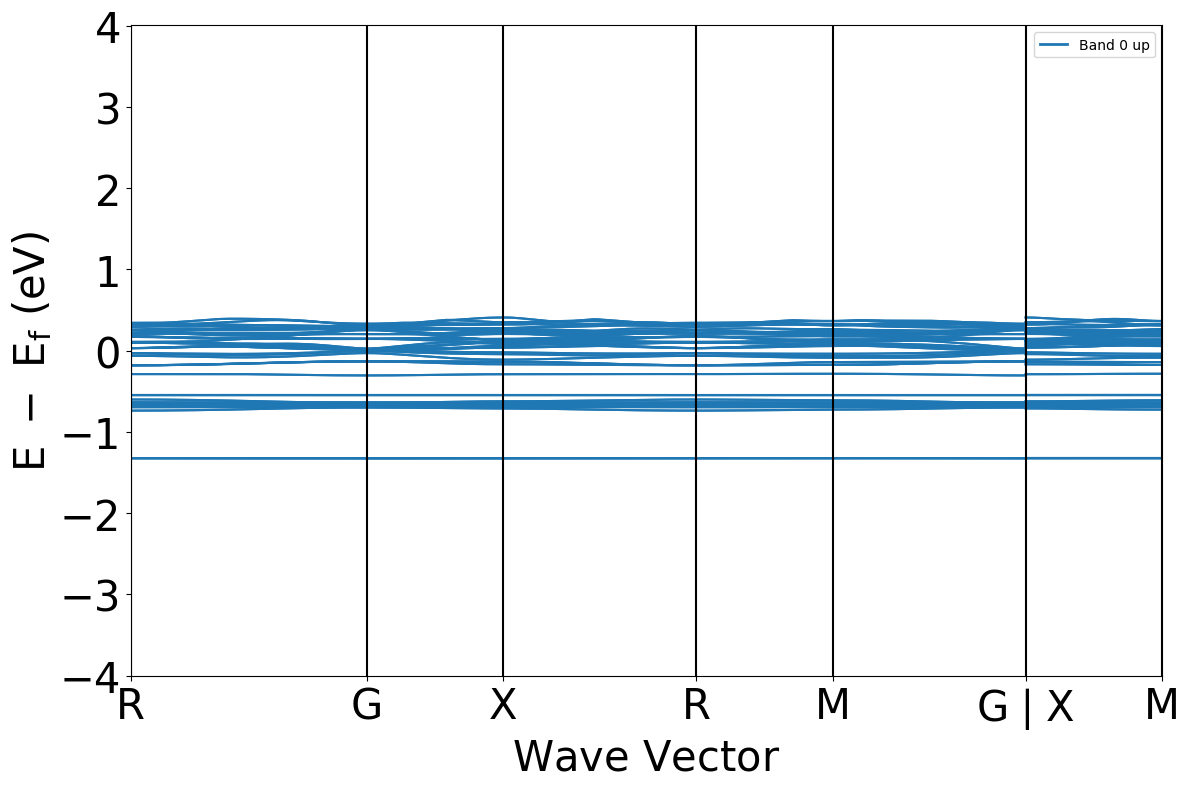

In [2]:
dir = 'Sr3PbO'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# Si
colinear band structure, but ibrav != 0 with kpoints in crystal_b
This causes the same issue as the Ni calculation with pwxml.actual_kpoints being different from those in the actual input file


scf.xml has as many bands as electrons/2, which should trigger a warning since such cases break BSPlotter()

8.0 8 2


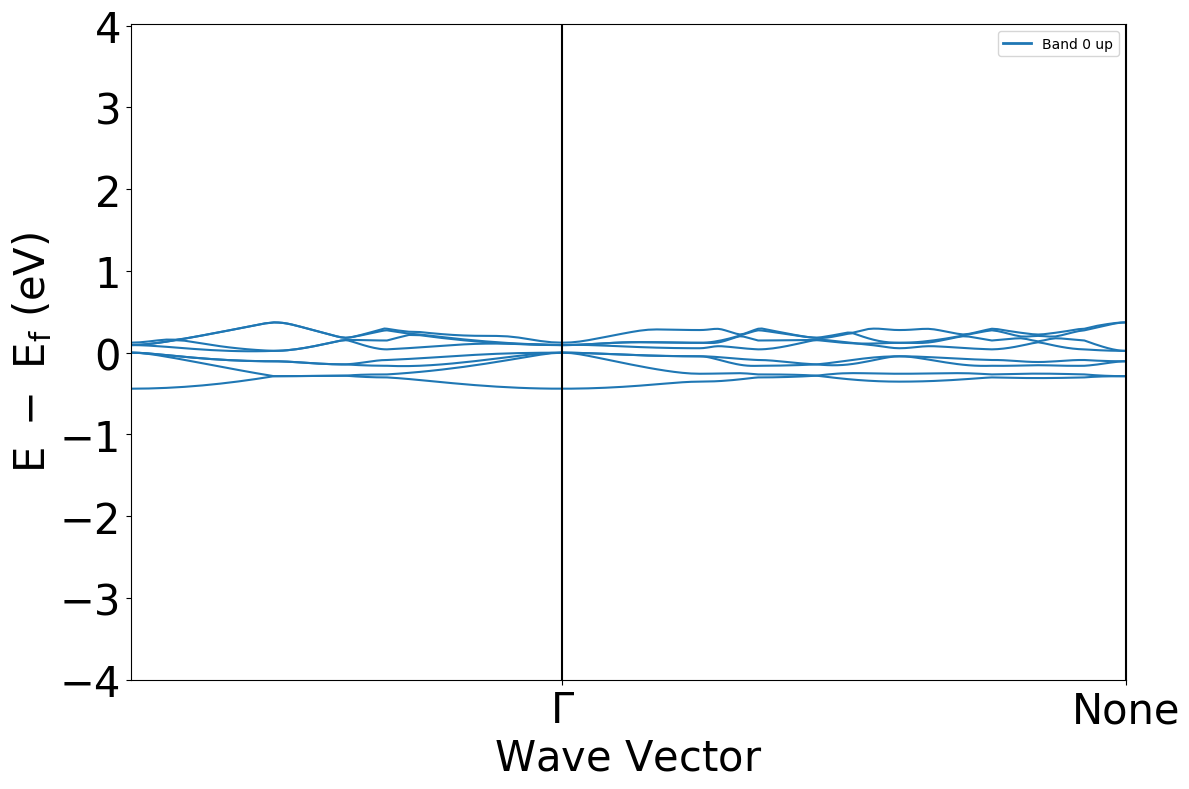

array([[ 0.      ,  0.      ,  0.      ],
       [-0.0625  ,  0.      ,  0.      ],
       [-0.125   ,  0.      ,  0.      ],
       [-0.1875  ,  0.      ,  0.      ],
       [-0.25    ,  0.      ,  0.      ],
       [-0.3125  ,  0.      ,  0.      ],
       [-0.375   ,  0.      ,  0.      ],
       [-0.4375  ,  0.      ,  0.      ],
       [-0.5     ,  0.      ,  0.      ],
       [-0.5625  ,  0.      ,  0.      ],
       [-0.625   ,  0.      ,  0.      ],
       [-0.6875  ,  0.      ,  0.      ],
       [-0.75    ,  0.      ,  0.      ],
       [-0.8125  ,  0.      ,  0.      ],
       [-0.875   ,  0.      ,  0.      ],
       [-0.9375  ,  0.      ,  0.      ],
       [-1.      ,  0.      ,  0.      ],
       [-1.      ,  0.03125 ,  0.      ],
       [-1.      ,  0.0625  ,  0.      ],
       [-1.      ,  0.09375 ,  0.      ],
       [-1.      ,  0.125   ,  0.      ],
       [-1.      ,  0.15625 ,  0.      ],
       [-1.      ,  0.1875  ,  0.      ],
       [-1.      ,  0.21875 ,  0. 

In [7]:
dir = 'Si'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# Al
collinear bands with ibrav != 0 and tpiba cartesian k points with no option for the K_POINTS card (i.e., need to parse default)

the ibrav = 2 seems to cause issues with the actual kpoints computed are different from those in the K_POINTS card (symm. equiv)

3.0 8 2


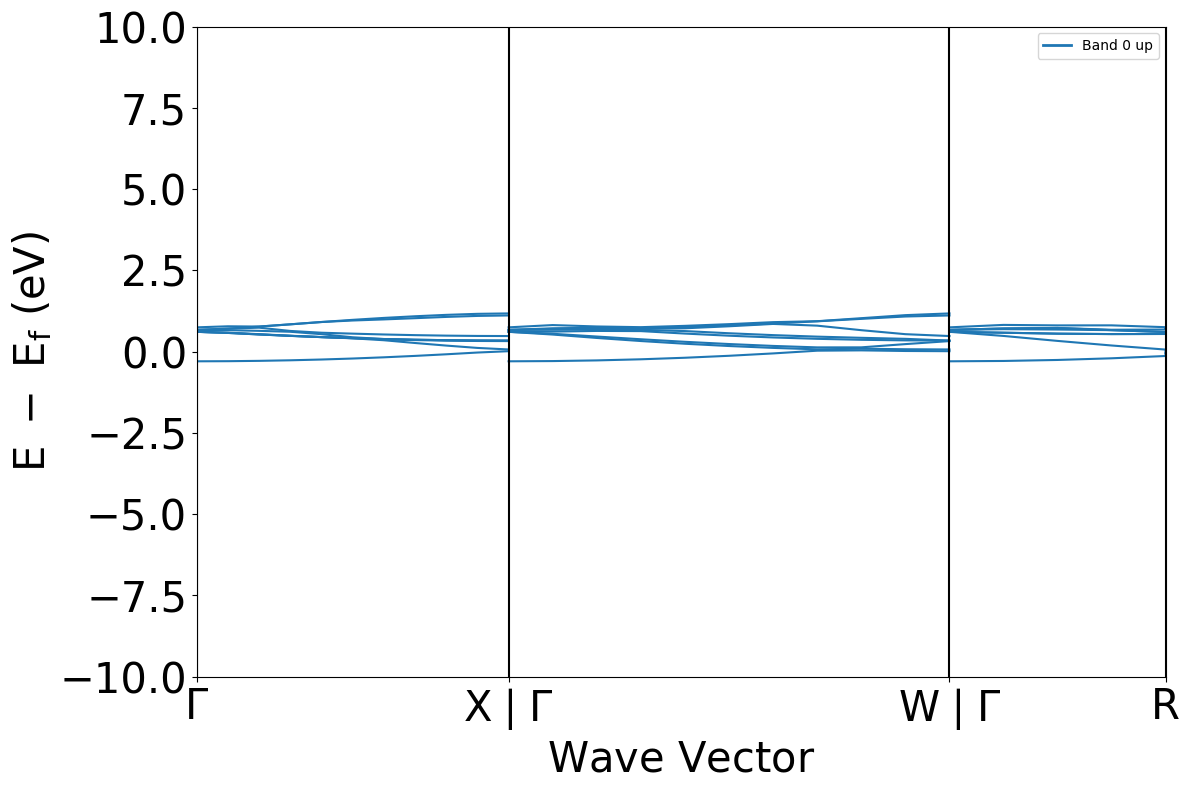

In [4]:
dir = 'Al'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# Ni
collinear, spin-polarized bands, with ibrav = 2

the ibrav = 2 seems to cause issues with the actual kpoints computed are different from those in the K_POINTS card (symm. equiv)

In [5]:
dir = 'Ni'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

KeyError: 'nbnd'

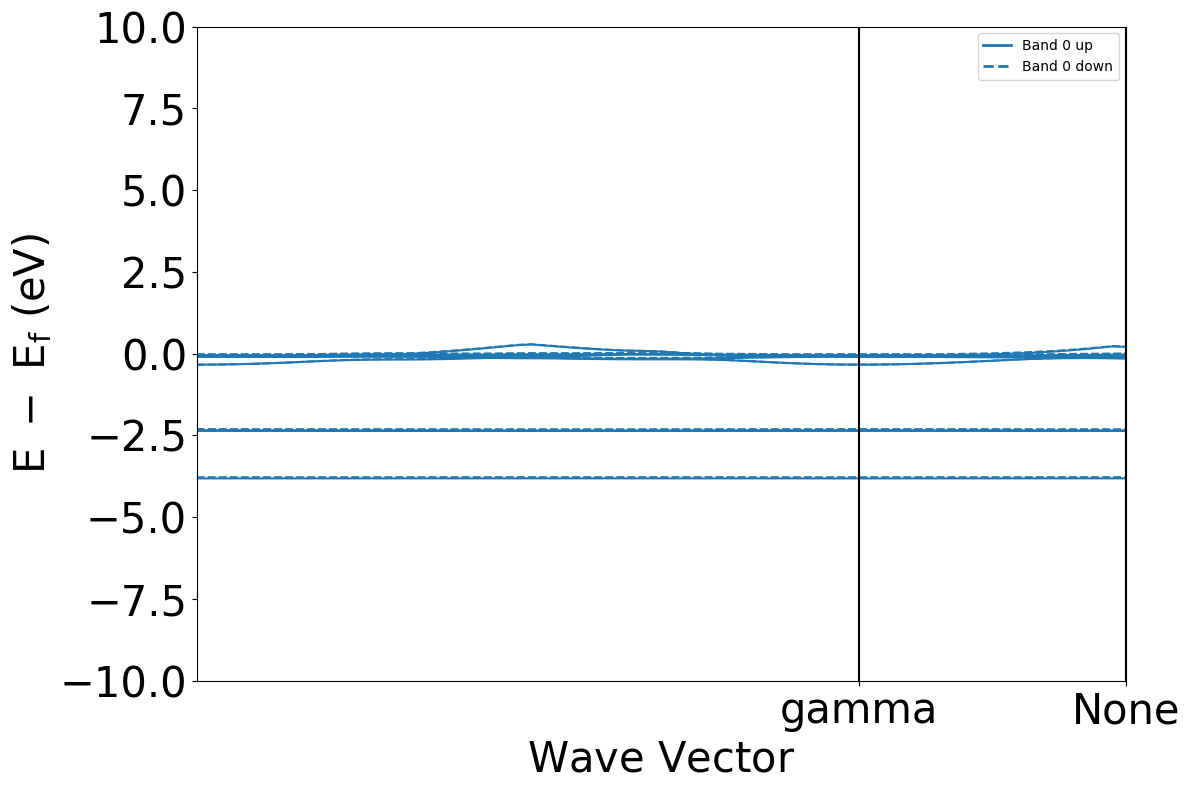

In [ ]:
dir = 'Ni'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# FeO
collinear, spin-polarized scf, with DFT+U

In [ ]:
dir = 'FeO'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/scf.xml'
pwxml = PWxml(xml_filename)
#print(pwin.to_str())

# MoS2
collinear scf, with vdW

In [ ]:
dir = 'MoS2'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/scf.xml'
pwxml = PWxml(xml_filename)
#print(pwin.to_str())

# Debugging

In [ ]:
dir = 'Si'
calc = 'bands'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/{calc}.xml'
with open(xml_filename, encoding="UTF-8") as xml:
    data = xmltodict.parse(xml.read())['qes:espresso']
data['input']['spin']

{'lsda': 'false', 'noncolin': 'false', 'spinorbit': 'false'}

In [ ]:
vasprun_filename = f'pymatgen/io/espresso/tests/data/{dir}/vasprun_{calc}.xml'
vasprun = Vasprun(vasprun_filename, parse_projected_eigen=True)
#kpoints_filename = 'pymatgen/io/espresso/tests/data/KPOINTS_Si_bands'
#bs = vasprun.get_band_structure(kpoints_filename=kpoints_filename)
#from pymatgen.electronic_structure.plotter import BSPlotter
#BSPlotter(bs).show()

FileNotFoundError: [Errno 2] No such file or directory: 'pymatgen/io/espresso/tests/data/Al/vasprun_bands.xml'

In [ ]:
vasprun.projected_eigenvalues[Spin.up].shape

(316, 80, 5, 9)

In [ ]:
str = 'K_POINTS {automatic}'
str = 'K_POINTS'
str.split()[0]

'K_POINTS'